# Optimization of ML Regression Models

In this project, we will compare the performance of different machine learning regression models on the Home Price Prediction data set. In addition, we will look into how to optimize each model for best performance.

The PipeLine and GridSearch tools from the Scikit-Learn library will be utilized.

The following regression models will be studied:

Linear Models: LinearRegression, Ridge, Lasso and ElasticNet

Boosting Algorithms: AdaBoostRegressor and GradientBoostingRegressor

For this project we will use the Kaggle Home price data set. Please follow the instructions in the post Working with the Home price data

Data Set to get yourself familiar with the dataset, prepare the data for analysis and generate the HPP.csv that will be used in this project.

# 1. Loading and Preparing the Data

Below, the code that separates the data into inputs, X and output, y is provided.

In [10]:
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')
%matplotlib inline

df= pd.read_csv('HPP.csv')
size = 1460
train_size = int(0.7*size)
X=df.iloc [:, 0:101]
x = X[:train_size]
X_test = X[train_size:]
Y=df[['SalePrice']]
y = Y[:train_size]
Y_test = Y[train_size:]
df.head(5)

NameError: name 'warnings' is not defined

The y variable holds the Sale Price column data and the X variable holds the features.

# 2. Test and Display Functions

The following funtions will be used in the remaining parts of this post.

In [4]:
def get_modelname(model):
    name = str(model).partition('(')[0]
    if name=='SVR':
        name = model.get_params()['kernel'] + name
    return(name)

get_modelname extracts the name of the model from the model function call. For support vector regression, the kernel name is also prepended to the model name.

In [5]:
def evalModels(models, Xw, y, boxPlotOn=True):
    from sklearn.preprocessing import StandardScaler # Standardize data (0 mean, 1 stdev)
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.pipeline import Pipeline, make_pipeline

    scoring = 'r2'  #'neg_mean_squared_error'
    modelnames = []
    results = []
    for model in models:
        pipe = make_pipeline( StandardScaler(), model )
        kfold = KFold(n_splits=8, random_state=6, shuffle=True)
        cv_results = cross_val_score(pipe, Xw, y, cv=kfold, scoring=scoring)
        modelname = get_modelname(model)
        print ("%s: %.3f %.3f" %(modelname, cv_results.mean(), cv_results.std()))
        modelnames.append(modelname)
        results.append(cv_results)
    
    if boxPlotOn:
        import matplotlib.pyplot as plt
        # boxplot algorithm comparison
        fig = plt.figure()
        fig.suptitle('Algorithm Comparison')
        ax = fig.add_subplot(111)
        plt.boxplot(results, showmeans=True)
        ax.set_xticklabels(modelnames, fontsize=9)
        plt.ylim(0.7, 0.95)
        plt.show()
    
    return(results)

The evalModels function includes the following:

A pipeline that includes standardization of the input vectors (so that variance is 1 and mean is zero) and application of the ML model.

Box plotting all the performance results

# 3. Comparison of ML regression models

In this section we run all regression models using 8-split cross-validation and compare the $R^2$ results.

All regressors have been manually optimized. In other words, a manual search has been conducted in the parameter space of each regressor for the best performing parameter set which was then used to call each model. The default setting is kept for those parameters that did not make any noticeable difference.

All input data has been standardized on the training data set.

# 3.1 Linear Regression

LinearRegression: 0.900 0.025
Ridge: 0.900 0.025
Lasso: 0.724 0.016
ElasticNet: 0.833 0.022


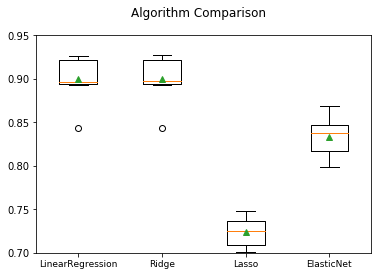

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# create and evaluate pipeline
models = []
models.append( LinearRegression() )
models.append( Ridge(alpha=1.0) )
models.append( Lasso(alpha=0.1) )
models.append( ElasticNet(alpha=0.1, l1_ratio=0.5) )

Xw = x
results = evalModels(models, Xw, y, boxPlotOn=True)

All linear regression models perform similarly. The linear models with regularization most likely act like a standard linear regressor since the data is standardized. Top performing score is R²=0.90 with std 0.025 achieved by standard linear regression and Ridge Regression.

# 3.2 Boosting methods

C:\Users\AKAYA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AKAYA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AKAYA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AKAYA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

AdaBoostRegressor: 0.767 0.030


C:\Users\AKAYA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AKAYA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AKAYA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AKAYA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GradientBoostingRegressor: 0.875 0.023


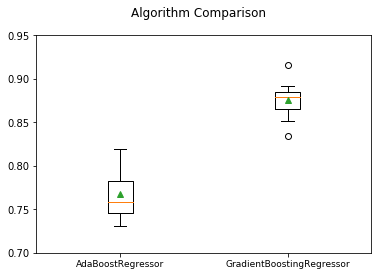

In [7]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# create and evaluate pipeline
models = []
models.append( AdaBoostRegressor(n_estimators=10, random_state=7) )
models.append( GradientBoostingRegressor(n_estimators=80, criterion='mae', max_features=5, min_samples_split=15, random_state=7) )

Xw = x
results = evalModels(models, Xw, y, boxPlotOn=True)

The boosting methods are decision-tree based as the models. The GradientBoosting has the lower std in performance so far: 0.023 for AdaBoost.

# 3.3 Comparison Summary
Below is the list of ML methods producing an average R² value larger than 0.85 starting with the highest score:

LinearRegression: 0.90 and 0.025

Ridge: 0.90 and 0.025

GradientBoostingRegressor: 0.87 and 0.023

# 4. Algorithm Tuning

# 4.1 Grid Search Parameter Tuning

In [11]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
standardizedX = scaler.transform(x)
Xw = standardizedX
from sklearn.model_selection import KFold

# Grid Search for Algorithm Tuning
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alphas = np.array([1,0.5,0.2,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
kfold = KFold(n_splits=8, random_state=6, shuffle=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
grid.fit(Xw, y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
#print grid.cv_results_

0.9012644474519641
0.0


C:\Users\AKAYA\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.542846e-18
  overwrite_a=True).T
C:\Users\AKAYA\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.740087e-18
  overwrite_a=True).T


# 4.2 Random Search Parameter Tuning

In [12]:
Xw = standardizedX

# Randomized for Algorithm Tuning
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': uniform()}
seed=6
model = Ridge()
kfold = KFold(n_splits=8, random_state=seed, shuffle=True)

rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=kfold, random_state=seed)
rsearch.fit(Xw, y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

0.8998245523556058
0.9942074384219376


In [17]:
rsearch.best_score_

0.8998245523556058